In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

import collections


In [2]:
df = pd.read_csv('../data/raw/geotuscany.csv', index_col=0)
df

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK,longitud§e
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,43.851808,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0,10.495633
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0,NaN
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0,NaN
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,43.893859,11.322421,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0,NaN
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858,1543,Nicola's Irish Pub,Lucca,False,/Restaurant_Review-g187898-d2546758-Reviews-Ni...,3.5,103,2.5,Nicola's Irish Pub,lucca,...,43.830280,10.497290,"Bar, Pub, Italian","Dinner, Late Night, Drinks",NaN,PHI_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g187898-d2546758-Reviews-Ni...,1,NaN
15859,1544,Bagno Montecristo di Levante,Forte Dei Marmi,False,/Restaurant_Review-g194766-d6659308-Reviews-Ba...,4.0,40,2.5,Bagno Montecristo di Levante,lucca,...,43.958260,10.165539,"Italian, Seafood","Breakfast, Lunch",Vegetarian Friendly,5zH_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194766-d6659308-Reviews-Ba...,1,NaN
15860,1546,Surfer Joe Cafe and Diner Lucca,Lucca,False,/Restaurant_Review-g187898-d13138519-Reviews-S...,3.5,97,1.0,Surfer Joe Cafe and Diner Lucca,lucca,...,43.839756,10.504320,"American, Mexican, Central American, Bar, Sout...","Lunch, Dinner, Late Night, Drinks, Brunch",Vegetarian Friendly,lD0_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g187898-d13138519-Reviews-S...,1,NaN
15861,1548,Ristorum in Campus Maior,Montemagno,True,/Restaurant_Review-g3802334-d12094110-Reviews-...,4.0,33,2.5,Ristorum in Campus Maior,lucca,...,43.910076,10.339700,Mediterranean,"Brunch, Breakfast, Lunch, Dinner",NaN,KLl_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g3802334-d12094110-Reviews-...,1,NaN


In [3]:
G = nx.read_graphml('../data/clean/byuser.graphml',node_type=int)
print(len(G),len(G.edges))
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[:3]: print(G.edges[node])

9107 111741
{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 414, 'end': 414, 'user': 'RobertaC2372', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'ClaudioC138', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'juan pablo A 116887066', 'days': 0, 'geodistance': 0.0004577378986709846}


In [4]:
users = dict()
for e in G.edges:
    user = G.edges[e]['user']
    if user not in users: 
        users[user] = dict()
        users[user]['edges'] = dict()
    users[user]['edges'][e] = G.edges[e]

In [5]:
len(users)

24581

In [6]:
   
for user in users: 
    visited = set()
    first = 1000
    last = 0 
    totalDistance = 0
    for e, edge in users[user]['edges'].items() :
        
        u,v,_ = e 
    
        visited.add(u)
        visited.add(v)
        start = edge['start']
        end =  edge['end'] 
        if start < first : first = start 
        if end > last: last = end
            
        if start == end: dist = 0 
        else : dist = edge['geodistance']
        totalDistance += dist  
        
        
    users[user]['visited']   = visited
    users[user]['Nvisited']   = len(visited)
    users[user]['first'] = first
    users[user]['last'] = last
    if last - first > 0 : users[user]['time'] = last-first
    else : users[user]['time'] = 1
    
    users[user]['frequency'] = len(visited) / users[user]['time']
    users[user]['distance'] = totalDistance
    
    

In [7]:
usersNE = {user : {k : v for k,v in users[user].items() if k != 'edges' and k != "visited"} for user in users }

## Who are the best reviewer ? 

In [8]:
def plot_best(mydict,attr, k = 10) : 
    sortdict = dict(sorted(mydict.items(), key=lambda item: item[1][attr], reverse=True))
    names = [name for name in sortdict.keys()]
    names = names[:k]
    values = [values[attr] for values in sortdict.values()]
    values = values[:k]
    
    plt.figure(figsize=(20,5))
    plt.bar(names, values, color=sns.color_palette('ocean',k))
    plt.xticks(rotation=25,ha='right')

#### By restaurants visited

In [9]:
dict(sorted(usersNE.items(), key=lambda item: item[1]['Nvisited'], reverse=True))

{'pietroburghese': {'Nvisited': 70,
  'first': 3,
  'last': 411,
  'time': 408,
  'frequency': 0.1715686274509804,
  'distance': 16.590103549662686},
 '562marim': {'Nvisited': 68,
  'first': 180,
  'last': 344,
  'time': 164,
  'frequency': 0.4146341463414634,
  'distance': 27.09422667648088},
 'ANDREA D 393209076': {'Nvisited': 57,
  'first': 1,
  'last': 411,
  'time': 410,
  'frequency': 0.13902439024390245,
  'distance': 14.012449124260531},
 'lmtour': {'Nvisited': 53,
  'first': 1,
  'last': 372,
  'time': 371,
  'frequency': 0.14285714285714285,
  'distance': 11.60724095727696},
 'DrZoidbergh': {'Nvisited': 38,
  'first': 11,
  'last': 335,
  'time': 324,
  'frequency': 0.11728395061728394,
  'distance': 89.19106312458258},
 'francescofra1981': {'Nvisited': 38,
  'first': 5,
  'last': 320,
  'time': 315,
  'frequency': 0.12063492063492064,
  'distance': 20.94933782078727},
 '12try09': {'Nvisited': 35,
  'first': 7,
  'last': 252,
  'time': 245,
  'frequency': 0.14285714285714285,

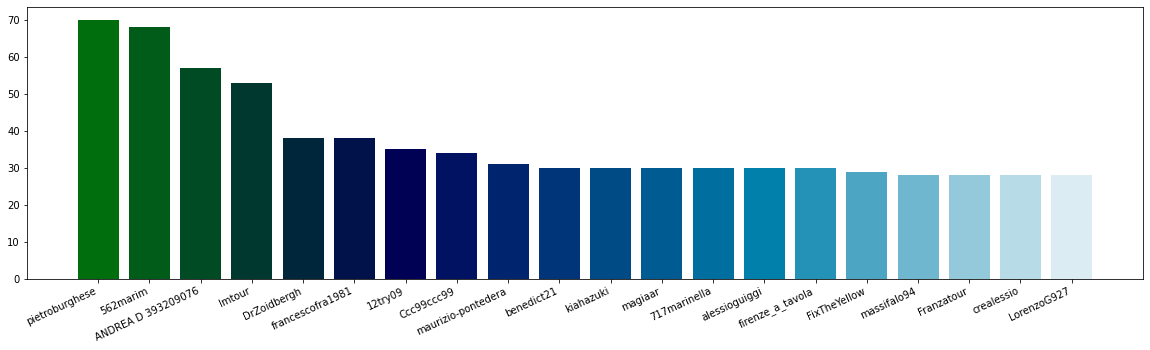

In [10]:
plot_best(usersNE,'Nvisited', k= 20)

In [11]:
topvisits=['pietroburghese','562marim','ANDREA D 393209076','lmtour'] 

#### By frequency

In [12]:
dict(sorted(usersNE.items(), key=lambda item: item[1]['frequency'], reverse=True))

{'adventurerfoodie': {'Nvisited': 12,
  'first': 223,
  'last': 223,
  'time': 1,
  'frequency': 12.0,
  'distance': 0},
 'ap1412': {'Nvisited': 12,
  'first': 147,
  'last': 148,
  'time': 1,
  'frequency': 12.0,
  'distance': 28.08048384502101},
 'Mark C 19820693': {'Nvisited': 11,
  'first': 228,
  'last': 228,
  'time': 1,
  'frequency': 11.0,
  'distance': 0},
 'francesco8590': {'Nvisited': 10,
  'first': 39,
  'last': 39,
  'time': 1,
  'frequency': 10.0,
  'distance': 0},
 'gine82': {'Nvisited': 10,
  'first': 182,
  'last': 183,
  'time': 1,
  'frequency': 10.0,
  'distance': 4.420730068119384},
 'Fas069': {'Nvisited': 10,
  'first': 177,
  'last': 178,
  'time': 1,
  'frequency': 10.0,
  'distance': 14.628412236017786},
 'oWmarco': {'Nvisited': 10,
  'first': 140,
  'last': 140,
  'time': 1,
  'frequency': 10.0,
  'distance': 0},
 'A4924AOlucab': {'Nvisited': 10,
  'first': 179,
  'last': 180,
  'time': 1,
  'frequency': 10.0,
  'distance': 1.0805147018338006},
 'simoska82': {

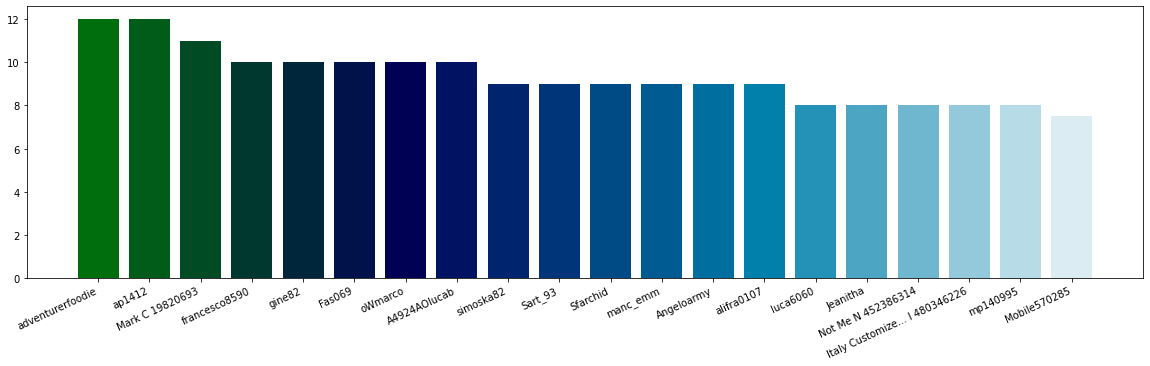

In [13]:
plot_best(usersNE,'frequency', k= 20)

In [14]:
topfr = ['adventurerfoodie','ap1412']

#### By spatial movement

In [15]:
dict(sorted(usersNE.items(), key=lambda item: item[1]['distance'], reverse=True))

{'nicolas s 452389216': {'Nvisited': 15,
  'first': 3,
  'last': 160,
  'time': 157,
  'frequency': 0.09554140127388536,
  'distance': 110.10431043598811},
 'massifalo94': {'Nvisited': 28,
  'first': 243,
  'last': 334,
  'time': 91,
  'frequency': 0.3076923076923077,
  'distance': 89.58464181068032},
 'DrZoidbergh': {'Nvisited': 38,
  'first': 11,
  'last': 335,
  'time': 324,
  'frequency': 0.11728395061728394,
  'distance': 89.19106312458258},
 '12try09': {'Nvisited': 35,
  'first': 7,
  'last': 252,
  'time': 245,
  'frequency': 0.14285714285714285,
  'distance': 53.63413618360207},
 'Alessandro S 89284187': {'Nvisited': 18,
  'first': 198,
  'last': 202,
  'time': 4,
  'frequency': 4.5,
  'distance': 47.86924224458715},
 'all_cool_things': {'Nvisited': 13,
  'first': 132,
  'last': 244,
  'time': 112,
  'frequency': 0.11607142857142858,
  'distance': 41.970366688607385},
 'johan6688': {'Nvisited': 8,
  'first': 152,
  'last': 174,
  'time': 22,
  'frequency': 0.36363636363636365,


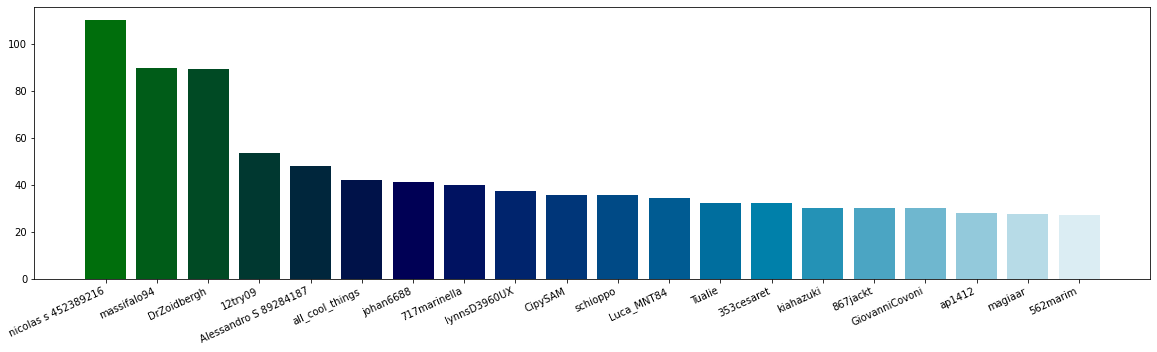

In [16]:
plot_best(usersNE,'distance', k= 20)

In [17]:
topdist = ['nicolas s 452389216','massifalo94','DrZoidbergh']

### TOP USERS

In [75]:
topUsers = topdist + topfr + topvisits
topUsers

['nicolas s 452389216',
 'massifalo94',
 'DrZoidbergh',
 'adventurerfoodie',
 'ap1412',
 'pietroburghese',
 '562marim',
 'ANDREA D 393209076',
 'lmtour']

In [80]:
for user in topUsers:
    yes = 0
    no = 0
    for resturant in users[user]['visited'] : 
        if df.loc[restaurant, 'covidMeasure'] : yes +=1
        else: no +=1
   
    print(user, yes,no)

nicolas s 452389216 0 15
massifalo94 0 28
DrZoidbergh 0 38
adventurerfoodie 0 12
ap1412 0 12
pietroburghese 0 70
562marim 0 68
ANDREA D 393209076 0 57
lmtour 0 53


In [79]:
for user in topdist:
    print(user)
    print(df.loc[users[user]['visited'], 'province'].value_counts(),end= '\n\n')
   
    

nicolas s 452389216
grosseto    9
florence    5
livorno     1
Name: province, dtype: int64

massifalo94
florence    13
livorno      7
pisa         6
siena        1
lucca        1
Name: province, dtype: int64

DrZoidbergh
livorno     17
siena       13
florence     7
arezzo       1
Name: province, dtype: int64



In [81]:
for user in topfr:
    print(user)
    print(df.loc[users[user]['visited'], 'province'].value_counts(),end= '\n\n')
   
    

adventurerfoodie
florence    10
siena        2
Name: province, dtype: int64

ap1412
lucca      5
livorno    4
pistoia    3
Name: province, dtype: int64



pietroburghese


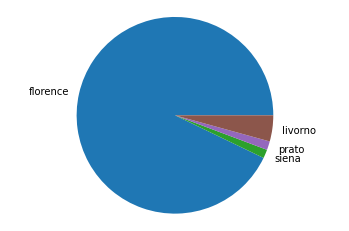

562marim


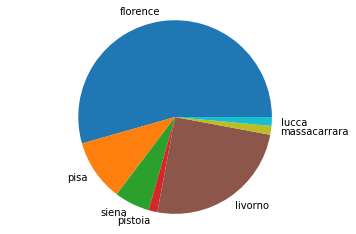

ANDREA D 393209076


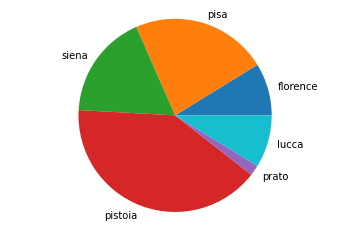

lmtour


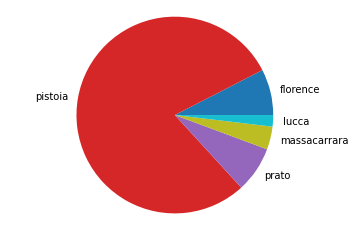

In [110]:
for user in topvisits:
    print(user)
    
    provinces = ['florence','pisa','siena','pistoia','prato','livorno','grosseto','arezzo','massacarrara','lucca']
    labels = []
    sizes = []
    colors = []
    counts = df.loc[users[user]['visited'], 'province'].value_counts()
    
    for i,province in enumerate(provinces):
    
        if province in counts: 
            sizes.append(counts[province])
            labels.append(province)
            colors.append('C'+str(i))
       

    # Plot
    plt.pie(sizes, labels=labels, colors = colors)

    plt.axis('equal')
    plt.show()
    

adventurerfoodie


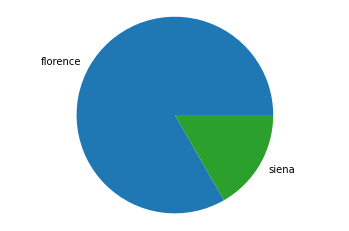

ap1412


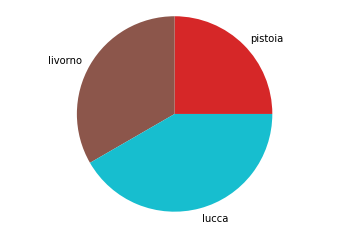

In [156]:
for user in topfr:
    print(user)
    
    provinces = ['florence','pisa','siena','pistoia','prato','livorno','grosseto','arezzo','massacarrara','lucca']
    labels = []
    sizes = []
    colors = []
    counts = df.loc[users[user]['visited'], 'province'].value_counts()
    
    for i,province in enumerate(provinces):
    
        if province in counts: 
            sizes.append(counts[province])
            labels.append(province)
            colors.append('C'+str(i))
       

    # Plot
    plt.pie(sizes, labels=labels, colors = colors)

    plt.axis('equal')
    plt.show()
    

nicolas s 452389216


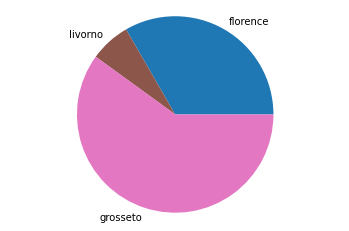

massifalo94


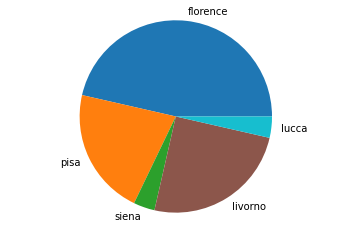

DrZoidbergh


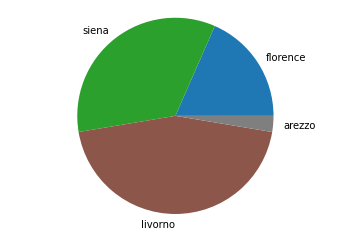

In [157]:
for user in topdist:
    print(user)
    
    provinces = ['florence','pisa','siena','pistoia','prato','livorno','grosseto','arezzo','massacarrara','lucca']
    labels = []
    sizes = []
    colors = []
    counts = df.loc[users[user]['visited'], 'province'].value_counts()
    
    for i,province in enumerate(provinces):
    
        if province in counts: 
            sizes.append(counts[province])
            labels.append(province)
            colors.append('C'+str(i))
       

    # Plot
    plt.pie(sizes, labels=labels, colors = colors)

    plt.axis('equal')
    plt.show()
    

In [103]:
labels

['pistoia', 'prato', 'florence', 'massacarrara', 'lucca']

ValueError: could not convert string to float: 'Osteria al Borgo'

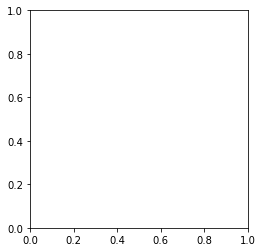

In [99]:
# Data to plot
labels = []
sizes = []

for x, y in df.loc[.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

### Sequential pattern mining

In [60]:
import prefixspan
from prefixspan import PrefixSpan
import importlib
importlib.reload( prefixspan)
from prefixspan import PrefixSpan

In [44]:
top5000 = list(dict(sorted(usersNE.items(), key=lambda item: item[1]['Nvisited'], reverse=True)).keys())[:5000]

In [45]:
tuscany = dict()
for e, edge in G.edges.items():
    user = edge['user']
    if user not in tuscany: tuscany[user]= dict()
    u,v,_ = e
    start = edge['start']
    end = edge['end']
    if start not in tuscany[user]: tuscany[user][start] = set()
    if end not in tuscany[user]: tuscany[user][end] = set()
    tuscany[user][start].add(u)
    tuscany[user][end].add(v)

In [46]:
tuscany

{'RobertaC2372': {414: {0, 15775}},
 'ClaudioC138': {414: {0, 15775}},
 'juan pablo A 116887066': {414: {0, 15775}},
 'umbeer': {243: {0, 15775}},
 'Nadietta70': {241: {0, 15775}},
 'TROPPOTOGO': {237: {0, 1979, 15775}},
 'salvochimicahl': {223: {0, 15775}},
 'asergioo': {211: {0, 15775}},
 'PerleHamburgs': {209: {0, 14479, 15775}},
 'Bettybbo': {207: {0, 15775}},
 'ADamcgu': {197: {0, 12564, 15775}},
 'alejandrott': {192: {0, 15775}},
 'claklaudio': {189: {0, 15775}},
 'mimilla29091984': {167: {0, 15775}, 170: {14805}},
 'Giusecurry': {160: {0, 15775}},
 'maramerlo666': {158: {0, 15775}},
 'Trip40358126059': {157: {0, 15775}},
 '539isabellar': {144: {0, 15775}},
 'fabiiorossi': {121: {0, 15775}},
 'HungryTerrone': {224: {1979, 2401}},
 'Manuel N 126118623': {173: {1979}, 327: {621}},
 'tastinglocal': {204: {1498, 1979, 2468, 2634},
  206: {1994},
  207: {1981, 2568},
  211: {2643},
  223: {6238},
  226: {564, 1990}},
 'Piddinci': {101: {1979}, 132: {13070}},
 'A1933AHsoniaa': {150: {1

In [47]:
sorttuscany = list()

for name, dates in tuscany.items():
    if name not in top5000: continue
    sortdates = sorted(dates.items(), key=lambda item: item[1], reverse=False)
    sorttuscany.append([tuple(visit[1]) for visit in sortdates])

In [49]:
sorttuscany

[[(0, 1979, 15775)],
 [(0, 14479, 15775)],
 [(0, 12564, 15775)],
 [(0, 15775), (14805,)],
 [(1498, 1979, 2468, 2634),
  (1994,),
  (2568, 1981),
  (2643,),
  (6238,),
  (564, 1990)],
 [(2584, 1979), (11360,), (1849, 2201, 2148, 2165)],
 [(1979,), (1976, 2003), (2163,)],
 [(1979,), (1993, 2162)],
 [(1979, 2191), (4513, 7245)],
 [(2184, 3722, 1979), (1981,)],
 [(3293, 14479), (2258,)],
 [(14479,),
  (9604,),
  (10661,),
  (8566,),
  (10589,),
  (732, 15158),
  (10482,),
  (2276,),
  (6394,),
  (10482,),
  (14745,),
  (13884,),
  (8592,),
  (14221,),
  (589,),
  (2772,),
  (9564,),
  (8393,),
  (8288,),
  (11208,),
  (8871,),
  (541,),
  (541,),
  (2753,),
  (8903,),
  (8530,),
  (14637,),
  (719,),
  (589,),
  (9572,),
  (15411,),
  (14944,)],
 [(14479,),
  (4119,),
  (14140,),
  (4649,),
  (7214,),
  (14691,),
  (14336,),
  (15522,),
  (14746,),
  (1806,),
  (1984,),
  (13923,),
  (9389,),
  (15558,)],
 [(14479,), (14382,), (3666, 5475), (5269,), (4088, 3685, 3854)],
 [(4180, 14911, 144

In [50]:
X = sorttuscany

In [51]:
ps = PrefixSpan(X)

In [80]:
for i in ps.topk(200,closed=True): 
    if len(i[1]) > 2  : print(i)

(9, [(2573,), (2225,), (1994,)])
(8, [(2460,), (2573,), (1994,)])


In [82]:
ps.topk(20,closed=True)

[(36, [(1994,)]),
 (30, [(2573,)]),
 (29, [(10597,)]),
 (29, [(10632,)]),
 (27, [(2460,)]),
 (27, [(3848,)]),
 (24, [(2225,)]),
 (23, [(1972,)]),
 (22, [(1992,)]),
 (22, [(10541,)]),
 (21, [(11353,)]),
 (20, [(2285,)]),
 (19, [(14693,)]),
 (18, [(14087,)]),
 (18, [(14467,)]),
 (17, [(2089,)]),
 (17, [(2573,), (1994,)]),
 (17, [(10647,)]),
 (17, [(10648,)]),
 (16, [(7230,)])]

In [ ]:
tuple([1,2,3,4])

In [85]:
for i in ps.frequent(4):
    if len(i[1]) > 2: print(i)

(9, [(2573,), (2225,), (1994,)])
(4, [(2573,), (2225,), (1994,), (2460,)])
(6, [(2573,), (2225,), (2460,)])
(7, [(2573,), (1994,), (2460,)])
(6, [(2225,), (1994,), (2460,)])
(4, [(2089,), (2460,), (2573,)])
(5, [(1776,), (2460,), (1994,)])
(4, [(1776,), (2460,), (2573,)])
(4, [(1776,), (2460,), (2573,), (1994,)])
(6, [(1776,), (2573,), (1994,)])
(8, [(2460,), (2573,), (1994,)])
(5, [(2460,), (2573,), (2225,)])
(4, [(1779,), (2460,), (2573,)])
(5, [(1779,), (2460,), (2225,)])
(4, [(1779,), (2460,), (1994,)])
(4, [(1779,), (2573,), (2225,)])


## TOP Restaurants ? 


In [160]:
restaurants = users['pietroburghese']['visited']
print(restaurants)
for user in topvisits:
    restaurants = restaurants.intersection(users[user]['visited'])

{1664, 1793, 3202, 6529, 7686, 2438, 6792, 6025, 1803, 6797, 10509, 7310, 16, 7313, 22, 2584, 6174, 802, 7075, 2468, 3365, 5927, 7463, 2220, 6319, 945, 7737, 3516, 7484, 2238, 9150, 2623, 7872, 1989, 326, 7751, 7752, 7750, 7749, 7498, 1868, 6220, 6222, 5969, 1747, 10963, 7763, 3286, 7639, 1240, 1371, 7646, 606, 7007, 5090, 2661, 5861, 2023, 7271, 7021, 6894, 6895, 621, 6129, 6896, 6773, 7542, 10491, 6909, 6911}


In [159]:
restaurants

set()

In [51]:
restaurants = dict()
for user in users:
    for restaurant in users[user]['visited']:
        if restaurant not in restaurants: restaurants[restaurant] = 1
        else : restaurants[restaurant] += 1

In [54]:
restaurantsNames = dict()
for restaurant in restaurants:
    restaurantsNames[df.loc[restaurant,'name']] = restaurants[restaurant]

<ipython-input-155-e5b83c897073>:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  mycolors = [['indianred','slateblue'][df.loc[r,'covidMeasure']] for r in restaurants]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

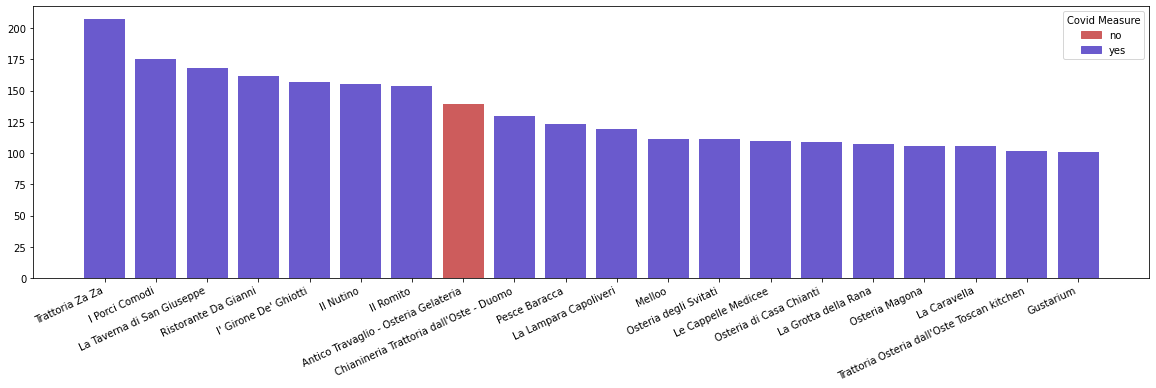

In [155]:
import matplotlib.patches as mpatches

k = 20


restaurantsNames = dict(sorted(restaurantsNames.items(), key=lambda item: item[1], reverse=True))
restaurants = dict(sorted(restaurants.items(), key=lambda item: item[1], reverse=True))
names, values = zip(*restaurantsNames.items()) 
names = names[:k]
values = values[:k]

mycolors = [['indianred','slateblue'][df.loc[r,'covidMeasure']] for r in restaurants]
plt.figure(figsize=(20,5))
plt.bar(names, values, color=mycolors)

red_patch = mpatches.Patch(color='indianred', label='no')
blue_patch = mpatches.Patch(color='slateblue', label='yes')
plt.legend(handles=[red_patch,blue_patch],title='Covid Measure')


plt.xticks(rotation=25,ha='right')

In [59]:
['g','r'][df.loc[0,'covidMeasure']]

<ipython-input-59-1e9b484ab6f5>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ['g','r'][df.loc[0,'covidMeasure']]


'g'

In [89]:
restaurants

{2285: 207,
 11353: 175,
 3848: 168,
 10597: 162,
 1981: 157,
 2015: 155,
 10632: 154,
 13832: 143,
 3666: 139,
 2192: 130,
 14693: 123,
 10788: 119,
 1992: 111,
 3623: 111,
 11204: 111,
 2016: 110,
 1972: 109,
 3667: 107,
 10541: 106,
 10073: 106,
 2592: 102,
 1987: 101,
 1994: 100,
 2184: 98,
 2573: 98,
 2005: 96,
 3847: 96,
 5386: 95,
 1849: 94,
 3622: 90,
 3684: 89,
 11357: 89,
 10818: 87,
 3643: 86,
 13005: 86,
 1990: 85,
 10556: 85,
 2092: 84,
 3727: 83,
 10647: 82,
 10786: 80,
 3849: 80,
 1970: 78,
 10448: 78,
 3741: 75,
 10718: 74,
 10622: 73,
 11893: 73,
 5251: 72,
 2238: 71,
 10523: 70,
 1848: 70,
 2417: 70,
 4051: 69,
 3931: 69,
 11278: 68,
 13676: 68,
 13843: 68,
 11272: 68,
 10643: 67,
 1931: 67,
 2155: 67,
 2178: 67,
 2628: 67,
 2401: 66,
 13743: 66,
 1980: 66,
 14854: 66,
 10637: 65,
 2089: 65,
 13700: 65,
 3672: 64,
 13770: 63,
 10536: 63,
 2225: 63,
 2134: 63,
 2008: 62,
 10569: 62,
 2165: 61,
 13656: 61,
 3674: 61,
 10627: 61,
 10553: 61,
 10574: 61,
 1824: 60,
 10476

In [94]:
df.loc[2285]

position                                                          397
name                                                  Trattoria Za Za
city                                                         Florence
menu                                                             True
link                /Restaurant_Review-g187895-d1102359-Reviews-Tr...
score                                                             4.5
N_reviews                                                       13317
price                                                             2.5
Name                                                  Trattoria Za Za
Province                                                     florence
City                                                         Florence
claimed                                                          True
covidMeasure                                                     True
travellersChoice                                                 True
latitude            